In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Datasets

In [1]:

# df = pd.read_excel('datos_avance.xlxs', sheet_name=None)
df = pd.read_excel('datos_avance.xlsx') 
df.head()


NameError: name 'pd' is not defined

In [5]:
dfname=pd.ExcelFile('datos_avance.xlsx')
print(dfname.sheet_names)


['acuerdos', 'payment_params', 'pagos', 'asignacion_fdem', 'resumen_creditos', 'gestiones_2022']


In [6]:
df_acuerdos =pd.read_excel(f'datos_avance.xlsx',sheet_name='acuerdos')
df_acuerdos.head()

,FechaCaptura,Credito,FechaAPagar,VRCancelar,PuntoPago,TipoPago,Asesor,VrTotalObligacion,VrTotalNegociado,Condonacion,TipoPago2,Cuotas,VrCuota1,VrOtrasCuotas,CuotaNumero,Estado,FechaPago
0,2016-11-08,904141001352,2016-11-30,100000,CDS o Efecty,Pago Parcial,Si,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
1,2016-11-23,904141001295,2016-12-21,260000,Oficina Fundaci¢n de la Mujer,Pago Parcial con Condonaci¢n,Si,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
2,2016-11-28,904141000816,2016-12-15,844000,Oficina Fundaci¢n de la Mujer,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
3,2016-11-19,904141000465,2016-11-30,75000,CDS o Efecty,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01
4,2016-11-09,904141000343,2016-11-30,55000,CDS o Efecty,Pago Parcial con Condonaci¢n,NaN,0,0,0,NaN,0,0,0,0,NaN,1900-01-01


In [5]:
# df_acuerdos.to_csv("acuerdos.csv",index=False)

In [7]:
df_payment_params =pd.read_excel(f'datos_avance.xlsx',sheet_name='payment_params')
df_payment_params.head()

,id,user_id,credit_number,value,description,pay_location_id,on_site,agreement_type_id,date,time,active,confirmed_user,confirmed_found,accesed_at,created_at,updated_at
0,2,1,641131002666,15000,NaN,1,0,1,\N,\N,0,0,0,\N,2017-02-28 19:05:29,2017-03-01 09:39:56
1,3,16,1490,200000,transcurso del dia,1,0,4,\N,\N,0,0,0,\N,2017-03-01 08:08:31,2017-03-01 09:35:55
2,4,16,1676,1420000,cancela en 15 minutos.,1,0,4,\N,\N,0,0,0,\N,2017-03-01 08:20:07,2017-03-01 09:35:04
3,5,21,614151006615,98000,cancelara en el transcurso del dia,1,0,3,\N,\N,0,0,0,\N,2017-03-01 08:50:36,2017-03-01 09:36:38
4,6,1,822141001963,1980000,NaN,1,0,1,\N,\N,0,0,0,\N,2017-03-01 08:54:19,2017-03-01 09:40:45


In [8]:
# df_payment_params.to_csv("payment_params.csv",index=False)

In [3]:
df_pagos =pd.read_excel(f'datos_avance.xlsx',sheet_name='pagos')
df_pagos.head()

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,MORA,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631,2032,0,0,2016-10-18,...,0,10556,332187,321631,0,0,594634,2050,NaN,NaN
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159,2142,0,0,2016-10-31,...,0,4182,153341,149159,0,3498,356515,2172,NaN,NaN
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108,490,0,0,2016-10-20,...,0,9799,393907,384108,0,20307,233846,510,NaN,NaN
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780,706,0,0,2016-10-21,...,0,20420,312200,291780,0,30678,226165,727,NaN,NaN
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613,803,1322611,803,2016-10-18,...,0,12549,100000,87451,0,0,52487,821,NaN,NaN


In [10]:
# df_pagos.to_csv("pagos.csv",index=False)

In [4]:
df_asignacion_fdem =pd.read_excel(f'datos_avance.xlsx',sheet_name='asignacion_fdem')
df_asignacion_fdem.head()

,obligacion,Titular,agencia,tipo,primera_asignacion,fecha_asignacion,fecha_desasignacion,nombre,ciudad,tel_casa,...,inter_corri,inter_mora,hyc,seguro,iva,valor_cuota,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente
0,201917264,1,201,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,SALAZAR ECHAVARRIA CARMEN ADRIANA,CUCUTA,75702725,...,29994,2397521,0,0,0,0,8,2,6,0
1,10191142053,2,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,GONZALEZ GONZALEZ EFRAIN,BUCARAMANGA,76731342,...,0,118354,0,0,0,0,12,11,1,0
2,10191144858,3,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,LANDAZABAL SANTANDER MILENA,BUCARAMANGA,76417311,...,10928,1297810,0,0,0,0,8,4,4,0
3,10191146050,4,101,MANTENIDO,2016-10-01,2016-10-01,2019-07-22 00:00:00,ESTUPIÑAN LOPEZ ARMANDO,BUCARAMANGA,76710070,...,20805,1987240,0,0,0,0,8,3,5,0
4,10191150337,5,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,OSMA MARTHA ADELINA,BUCARAMANGA,76732213,...,66677,4464796,2125,0,340,0,14,6,8,0


In [18]:
df_asignacion_fdem.rename({'obligacion':'Credito'},axis = 1, inplace = True)

In [19]:
df_asignacion_fdem.columns

Index(['Credito', 'Titular', 'agencia', 'tipo', 'primera_asignacion',
       'fecha_asignacion', 'fecha_desasignacion', 'nombre', 'ciudad',
       'tel_casa', 'tel_negocio', 'celular', 'cedula_conyuge',
       'nombre_conyuge', 'tel_casa_conyuge', 'tel_negocio_conyuge',
       'celular_conyuge', 'nombre_garante', 'cedula_garante',
       'tel_casa_garante', 'tel_negocio_garante', 'celular_garante',
       'producto', 'dias_atraso', 'fecha_atraso', 'fecha_desembolso',
       'fecha_castigo', 'grupo_castigo', 'ultimo_pago', 'monto', 'capital',
       'inter_corri', 'inter_mora', 'hyc', 'seguro', 'iva', 'valor_cuota',
       'nro_cuotas_atrasadas', 'cuotas_canceladas', 'cuotas_vencidas',
       'vigente'],
      dtype='object')

In [11]:
df_asignacion_fdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165200 entries, 0 to 165199
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   obligacion            165200 non-null  int64         
 1   Titular               165200 non-null  int64         
 2   agencia               165200 non-null  int64         
 3   tipo                  165200 non-null  object        
 4   primera_asignacion    165200 non-null  datetime64[ns]
 5   fecha_asignacion      165200 non-null  datetime64[ns]
 6   fecha_desasignacion   165200 non-null  object        
 7   nombre                165200 non-null  object        
 8   ciudad                165200 non-null  object        
 9   tel_casa              165200 non-null  int64         
 10  tel_negocio           165200 non-null  int64         
 11  celular               165200 non-null  int64         
 12  cedula_conyuge        165200 non-null  int64         
 13 

In [273]:
df_asignacion_fdem.nunique()

Credito                 165200
Titular                 134933
agencia                    258
tipo                        21
primera_asignacion          27
fecha_asignacion            26
fecha_desasignacion         37
nombre                  134889
ciudad                     917
tel_casa                 27086
tel_negocio              67789
celular                 126751
cedula_conyuge           59920
nombre_conyuge           59913
tel_casa_conyuge          9392
tel_negocio_conyuge       8701
celular_conyuge          53610
nombre_garante           48559
cedula_garante           48668
tel_casa_garante          8717
tel_negocio_garante      10224
celular_garante          42677
producto                   111
dias_atraso               4043
fecha_atraso              5758
fecha_desembolso          4418
fecha_castigo               73
grupo_castigo               64
ultimo_pago               4437
monto                    36795
capital                 125973
inter_corri             105073
inter_mo

In [12]:
# df_asignacion_fdem.to_csv("asignacion_fdem.csv",index=False)

In [4]:
df_resumen_creditos =pd.read_excel(f'datos_avance.xlsx',sheet_name='resumen_creditos')
df_resumen_creditos.head()


,credito,fecha_primera_asignacion,fecha_desasignacion,fecha_entrega,ultima_entrega,tipo,fecha_castigo,fecha_desembolso,capital_desembolso,cuotas_aprobadas,...,garantes,dir_domicilio_garante,dir_negocio_garante,tel_celular_garante,tel_casa_garante,tel_negocio_garante,tel_fijo_garante,tarea_asignada,f_proceso,hora_contactar
0,628131002696,2019-12-05,2022-08-11 00:00:00,2022-03-09,2022-08-11 00:00:00,\N,2016-10-01,2013-12-16 00:00:00,1780245,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
1,402911602288,2019-07-19,2019-08-31 00:00:00,2019-07-19,2022-02-18 00:00:00,\N,2016-10-01,2007-02-28 00:00:00,10800000,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
2,619131006104,2016-10-01,2020-07-03 00:00:00,2016-10-01,2022-02-18 00:00:00,\N,2016-10-01,2013-11-28 00:00:00,1075100,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
3,209131030884,2016-10-01,2019-07-22 00:00:00,2016-10-01,2022-02-18 00:00:00,\N,2016-10-01,2013-11-19 00:00:00,1690000,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N
4,623171011326,2019-07-19,2022-03-09 00:00:00,2019-07-19,2022-02-18 00:00:00,\N,2019-06-29,2017-01-27 00:00:00,8035240,0,...,\N,\N,\N,\N,\N,\N,\N,NaN,2022-10-04 10:05:08,\N


In [ ]:
df_resumen_creditos.columns

In [ ]:
df_resumen_creditos.info()


In [ ]:
df_resumen_creditos['credito'].info()

### Rate of Recovery (Test #1)


Objetivo: Predecir cuales factores influyen más en el pago de una mayor proporción de la deuda.

In [5]:
df_pagos.head(5)

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,MORA,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631,2032,0,0,2016-10-18,...,0,10556,332187,321631,0,0,594634,2050,NaN,NaN
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159,2142,0,0,2016-10-31,...,0,4182,153341,149159,0,3498,356515,2172,NaN,NaN
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108,490,0,0,2016-10-20,...,0,9799,393907,384108,0,20307,233846,510,NaN,NaN
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780,706,0,0,2016-10-21,...,0,20420,312200,291780,0,30678,226165,727,NaN,NaN
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613,803,1322611,803,2016-10-18,...,0,12549,100000,87451,0,0,52487,821,NaN,NaN


In [274]:
df_pagos.nunique()

MesCargue              71
Codigo                267
Agencia               529
Credito             28870
Estado                  5
SaldoFindeMes       80968
DiasMoraFindeMes     2827
SaldoActual         64306
DiasmoraActual       2789
FechaValor           1743
FechaPago            1716
RangoCuotas             6
Cuotas               2811
ValorCuota          15922
TipoPago                3
CAPITAL             69489
INTERES             33970
MORA                21099
PAGOSOTROS          31796
TotalCancelado      12794
VRgoech             61958
CONDCAPITAL          1777
CONDINTERES         10964
CONDMORA            62106
DiasMoraPago         4318
Reverso              2124
Concepto                5
dtype: int64

In [8]:
df_pagos['SaldoFindeMes'].isna().value_counts()

False    101214
Name: SaldoFindeMes, dtype: int64

In [7]:
isinstance(df_pagos, pd.DataFrame)

True

In [9]:
df_pagos['SaldoFindeMes'] = df_pagos['SaldoFindeMes'].replace(0, np.nan)



In [10]:
df_pagos['SaldoFindeMes'].isna().value_counts()

False    101172
True         42
Name: SaldoFindeMes, dtype: int64

In [11]:
df_pagos_cleaned = df_pagos.dropna(subset = ["SaldoFindeMes"]) 

In [12]:
df_pagos_cleaned["SaldoFindeMes"].isna().value_counts()

False    101172
Name: SaldoFindeMes, dtype: int64

In [13]:
df_pagos_cleaned['rate'] = df_pagos_cleaned['TotalCancelado']/df_pagos_cleaned['SaldoFindeMes']

/tmp/ipykernel_769/3106164577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pagos_cleaned['rate'] = df_pagos_cleaned['TotalCancelado']/df_pagos_cleaned['SaldoFindeMes']


In [14]:
df_pagos_cleaned.head()

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,PAGOSOTROS,TotalCancelado,VRgoech,CONDCAPITAL,CONDINTERES,CONDMORA,DiasMoraPago,Reverso,Concepto,rate
0,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101101002728,Castigado,321631.0,2032,0,0,2016-10-18,...,10556,332187,321631,0,0,594634,2050,NaN,NaN,1.032820
1,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101104101267,Castigado,149159.0,2142,0,0,2016-10-31,...,4182,153341,149159,0,3498,356515,2172,NaN,NaN,1.028037
2,2016-10,101,BUCARAMANGA AGENCIA PRINCIPAL,101131041847,Castigado,384108.0,490,0,0,2016-10-20,...,9799,393907,384108,0,20307,233846,510,NaN,NaN,1.025511
3,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028221,Castigado,291780.0,706,0,0,2016-10-21,...,20420,312200,291780,0,30678,226165,727,NaN,NaN,1.069984
4,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613.0,803,1322611,803,2016-10-18,...,12549,100000,87451,0,0,52487,821,NaN,NaN,0.073335


In [15]:
df_pagos_cleaned['SaldoFindeMes'].info()

<class 'pandas.core.series.Series'>
Int64Index: 101172 entries, 0 to 101213
Series name: SaldoFindeMes
Non-Null Count   Dtype  
--------------   -----  
101172 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [16]:
df_pagos_cleaned['rate'].describe()

count    101172.000000
mean          0.440709
std           1.849641
min           0.000002
25%           0.103865
50%           0.221439
75%           0.591595
max         518.687059
Name: rate, dtype: float64

## Merging Dataset

### Merging Individual Credit numbers (Total Cancelado / SaldoFindeMes)

In [50]:
df_merged = df_pagos_cleaned.merge(df_asignacion_fdem, on='Credito', how='inner')


In [51]:
df_merged.head()

,MesCargue,Codigo,Agencia,Credito,Estado,SaldoFindeMes,DiasMoraFindeMes,SaldoActual,DiasmoraActual,FechaValor,...,inter_corri,inter_mora,hyc,seguro,iva,valor_cuota,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente
0,2016-10,102,BUCARAMANGA AGENCIA ASTURIAS,102141028298,Castigado,1363613.0,803,1322611,803,2016-10-18,...,328060,1600589,98329,3184,18686,121691,18,4,14,0
1,2016-10,104,BUCARAMANGA AGENCIA CABECERA,104131021163,Castigado,3999034.0,645,3999034,675,2016-10-05,...,0,66918,91812,4674,17448,205710,48,35,13,0
2,2016-11,104,BUCARAMANGA AGENCIA CABECERA,104131021163,Castigado,3999034.0,675,3839013,646,2016-11-09,...,0,66918,91812,4674,17448,205710,48,35,13,0
3,2016-11,104,BUCARAMANGA AGENCIA CABECERA,104131021163,Castigado,3999034.0,675,3839013,646,2016-11-30,...,0,66918,91812,4674,17448,205710,48,35,13,0
4,2017-01,104,BUCARAMANGA AGENCIA CABECERA,104131021163,Castigado,3839013.0,675,3760966,676,2017-01-11,...,0,66918,91812,4674,17448,205710,48,35,13,0


In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64713 entries, 0 to 64712
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MesCargue             64713 non-null  object        
 1   Codigo                64713 non-null  int64         
 2   Agencia               64713 non-null  object        
 3   Credito               64713 non-null  int64         
 4   Estado                64713 non-null  object        
 5   SaldoFindeMes         64713 non-null  float64       
 6   DiasMoraFindeMes      64713 non-null  int64         
 7   SaldoActual           64713 non-null  int64         
 8   DiasmoraActual        64713 non-null  int64         
 9   FechaValor            64713 non-null  datetime64[ns]
 10  FechaPago             64713 non-null  datetime64[ns]
 11  RangoCuotas           64713 non-null  object        
 12  Cuotas                64713 non-null  int64         
 13  ValorCuota      

In [41]:
df_merged.columns

Index(['MesCargue', 'Codigo', 'Agencia', 'Credito', 'Estado', 'SaldoFindeMes',
       'DiasMoraFindeMes', 'SaldoActual', 'DiasmoraActual', 'FechaValor',
       'FechaPago', 'RangoCuotas', 'Cuotas', 'ValorCuota', 'TipoPago',
       'CAPITAL', 'INTERES', 'MORA', 'PAGOSOTROS', 'TotalCancelado', 'VRgoech',
       'CONDCAPITAL', 'CONDINTERES', 'CONDMORA', 'DiasMoraPago', 'Reverso',
       'Concepto', 'rate', 'Titular', 'agencia', 'tipo', 'primera_asignacion',
       'fecha_asignacion', 'fecha_desasignacion', 'nombre', 'ciudad',
       'tel_casa', 'tel_negocio', 'celular', 'cedula_conyuge',
       'nombre_conyuge', 'tel_casa_conyuge', 'tel_negocio_conyuge',
       'celular_conyuge', 'nombre_garante', 'cedula_garante',
       'tel_casa_garante', 'tel_negocio_garante', 'celular_garante',
       'producto', 'dias_atraso', 'fecha_atraso', 'fecha_desembolso',
       'fecha_castigo', 'grupo_castigo', 'ultimo_pago', 'monto', 'capital',
       'inter_corri', 'inter_mora', 'hyc', 'seguro', 'iva', 'va

In [146]:
df_features = df_merged[['Credito','agencia','tipo','nombre','nombre_conyuge','nombre_garante','ciudad','producto', 'dias_atraso', 'grupo_castigo', 'ultimo_pago', 'monto', 'nro_cuotas_atrasadas', 'cuotas_canceladas', 'cuotas_vencidas','vigente','rate']]
df_features.columns

Index(['Credito', 'agencia', 'tipo', 'nombre', 'nombre_conyuge',
       'nombre_garante', 'ciudad', 'producto', 'dias_atraso', 'grupo_castigo',
       'ultimo_pago', 'monto', 'nro_cuotas_atrasadas', 'cuotas_canceladas',
       'cuotas_vencidas', 'vigente', 'rate'],
      dtype='object')

In [147]:
df_features.head()

,Credito,agencia,tipo,nombre,nombre_conyuge,nombre_garante,ciudad,producto,dias_atraso,grupo_castigo,ultimo_pago,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,rate
0,102141028298,102,NUEVO2,PIMIENTO APARICIO TERESA,NaN,HERRERA LUNA EDUARDO,FLORIDABLANCA,Fundacredito Maquinaria y Equipo con H y C Dif...,1763,2016-10-01,2016-10-18 00:00:00,1600000,18,4,14,0,0.073335
1,104131021163,104,MANTENIDO,PABON RAMOS ANA BENILDA,MORENO PARMENIO,NaN,BUCARAMANGA,Fundacredito Reestructurado Microcrédito > 30 ...,915,2016-10-01,2019-02-04 00:00:00,4960653,48,35,13,0,0.025006
2,104131021163,104,MANTENIDO,PABON RAMOS ANA BENILDA,MORENO PARMENIO,NaN,BUCARAMANGA,Fundacredito Reestructurado Microcrédito > 30 ...,915,2016-10-01,2019-02-04 00:00:00,4960653,48,35,13,0,0.025006
3,104131021163,104,MANTENIDO,PABON RAMOS ANA BENILDA,MORENO PARMENIO,NaN,BUCARAMANGA,Fundacredito Reestructurado Microcrédito > 30 ...,915,2016-10-01,2019-02-04 00:00:00,4960653,48,35,13,0,0.025006
4,104131021163,104,MANTENIDO,PABON RAMOS ANA BENILDA,MORENO PARMENIO,NaN,BUCARAMANGA,Fundacredito Reestructurado Microcrédito > 30 ...,915,2016-10-01,2019-02-04 00:00:00,4960653,48,35,13,0,0.025527


### Merging Total Cancelado

In [275]:
df_total = df_pagos.groupby('Credito')['TotalCancelado'].sum()

In [277]:
df_total.head()

Credito
10191138571    310000
10191147413    506660
10691417316    104829
10691418568    256732
10691419227    500000
Name: TotalCancelado, dtype: int64

In [279]:
df_merge2 = df_asignacion_fdem.merge(df_total, on='Credito', how='inner')

In [282]:
df_merge2.head()


,Credito,Titular,agencia,tipo,primera_asignacion,fecha_asignacion,fecha_desasignacion,nombre,ciudad,tel_casa,...,inter_mora,hyc,seguro,iva,valor_cuota,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado
0,101104101421,95,101,MANTENIDO,2016-10-01,2016-10-01,\N,ZAPATA JIMENEZ NATHALI,BUCARAMANGA,3175220817,...,28001,0,69,0,79913,12,9,3,0,695000
1,101111013583,140,101,MANTENIDO,2016-10-01,2016-10-01,\N,FUENTES CARLOS EDUARDO,FLORIDABLANCA,76190026,...,207345,22601,437,4292,91658,24,8,6,1,320000
2,101111014610,153,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,GARCIA RODRIGUEZ FRANKLIN GEOVANNY,FLORIDABLANCA,76196665,...,1774888,0,622,0,99815,8,2,6,0,1300000
3,101111015376,161,101,MANTENIDO,2016-10-01,2016-10-01,2019-08-31 00:00:00,GOMEZ LUIS RAMON,BUCARAMANGA,0,...,3448115,71755,1828,13636,132996,14,4,10,0,1886000
4,101111016438,180,101,MANTENIDO,2016-10-01,2016-10-01,2020-07-03 00:00:00,GONZALEZ RONDON MARIA DOLORES,BUCARAMANGA,76701592,...,153754,36059,825,6852,174804,15,9,6,0,150000


In [284]:
df_features2 = df_merge2[['Credito','agencia','tipo','primera_asignacion','nombre','nombre_conyuge','nombre_garante','ciudad','producto', 'dias_atraso', 'grupo_castigo', 'ultimo_pago', 'monto', 'nro_cuotas_atrasadas', 'cuotas_canceladas', 'cuotas_vencidas','vigente','TotalCancelado']]
df_features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Credito               15289 non-null  int64         
 1   agencia               15289 non-null  int64         
 2   tipo                  15289 non-null  object        
 3   primera_asignacion    15289 non-null  datetime64[ns]
 4   nombre                15289 non-null  object        
 5   nombre_conyuge        6355 non-null   object        
 6   nombre_garante        6497 non-null   object        
 7   ciudad                15289 non-null  object        
 8   producto              15289 non-null  object        
 9   dias_atraso           15289 non-null  int64         
 10  grupo_castigo         15289 non-null  datetime64[ns]
 11  ultimo_pago           15289 non-null  object        
 12  monto                 15289 non-null  int64         
 13  nro_cuotas_atras

## Data Preprocessing

### RATE Outliers 

In [286]:
df_features['rate'].describe()

count    64713.000000
mean         0.340399
std          2.146244
min          0.000002
25%          0.079822
50%          0.152514
75%          0.361664
max        518.687059
Name: rate, dtype: float64

In [149]:
df_features.loc[df_features['rate'].idxmax()]

Credito                                   201181008168
agencia                                            201
tipo                                           NUEVO11
nombre                  LAGUADO SALDARRIAGA FELIX OMAR
nombre_conyuge                                     NaN
nombre_garante                                     NaN
ciudad                                          CUCUTA
producto                    Fundacredito Activos Fijos
dias_atraso                                        190
grupo_castigo                      2020-12-31 00:00:00
ultimo_pago                        2020-03-20 00:00:00
monto                                          3000000
nro_cuotas_atrasadas                                 3
cuotas_canceladas                                   17
cuotas_vencidas                                      7
vigente                                              0
rate                                        518.687059
Name: 50122, dtype: object

<AxesSubplot:>

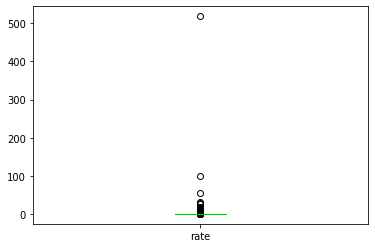

In [150]:
df_features['rate'].plot(kind='box')

In [237]:
df_out = df_features[df_features['rate'] < 1.3]  

In [238]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62687 entries, 0 to 64712
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Credito               62687 non-null  int64         
 1   agencia               62687 non-null  int64         
 2   tipo                  62687 non-null  object        
 3   nombre                62687 non-null  object        
 4   nombre_conyuge        26108 non-null  object        
 5   nombre_garante        26609 non-null  object        
 6   ciudad                62687 non-null  object        
 7   producto              62687 non-null  object        
 8   dias_atraso           62687 non-null  int64         
 9   grupo_castigo         62687 non-null  datetime64[ns]
 10  ultimo_pago           62687 non-null  object        
 11  monto                 62687 non-null  int64         
 12  nro_cuotas_atrasadas  62687 non-null  int64         
 13  cuotas_cancelada

<AxesSubplot:>

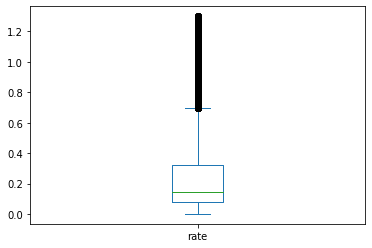

In [239]:
df_out['rate'].plot(kind='box')

In [240]:
df_out['rate'].describe()

count    62687.000000
mean         0.281815
std          0.321138
min          0.000002
25%          0.078167
50%          0.146126
75%          0.324532
max          1.299883
Name: rate, dtype: float64

### Conyuge 

Determinar si usuarios tienen conyuge o en caso contrario calificarlos como solteros

In [291]:
df_features2['nombre_conyuge'].sample(10)

7871                            Soltero
12004                           Soltero
2708     Casado   Casado  Casado Casado
3414                            Soltero
13073                           Soltero
13445                           Soltero
1686       Casado  Casado Casado Casado
5922           Casado   Casado Casado  
8407                            Soltero
7073                            Soltero
Name: nombre_conyuge, dtype: object

In [288]:
df_features2['nombre_conyuge'].replace(to_replace=r"[\w'-]+", value='Casado', regex = True, inplace=True)

/tmp/ipykernel_769/685860107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features2['nombre_conyuge'].replace(to_replace=r"[\w'-]+", value='Casado', regex = True, inplace=True)


In [289]:
df_features2['nombre_conyuge'].fillna('Soltero', inplace=True)

/tmp/ipykernel_769/1737581884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features2['nombre_conyuge'].fillna('Soltero', inplace=True)


In [293]:
df_features2.loc[df_features2['nombre_conyuge'].str.contains('Casado'), 'nombre_conyuge'] = 'Casado'


In [294]:
df_features2['nombre_conyuge'].sample(10)

1274      Casado
3117      Casado
10324    Soltero
8420     Soltero
7731      Casado
15257     Casado
15120    Soltero
2922     Soltero
1866      Casado
11012    Soltero
Name: nombre_conyuge, dtype: object

### Garante

Determinar si usuarios tienen garante

In [295]:
df_features2['nombre_garante'].replace(to_replace=r"[\w'-]+", value='Si', regex = True, inplace=True)

/tmp/ipykernel_769/3084327447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features2['nombre_garante'].replace(to_replace=r"[\w'-]+", value='Si', regex = True, inplace=True)


In [296]:
df_features2['nombre_garante'].fillna('No', inplace=True)
df_features2.loc[df_features2['nombre_garante'].str.contains('Si'), 'nombre_garante'] = 'Si'


/tmp/ipykernel_769/1469585608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features2['nombre_garante'].fillna('No', inplace=True)


In [297]:
df_features2['nombre_garante'].sample(10)

3149     No
14351    No
8930     Si
3281     Si
2366     Si
6278     No
14851    Si
10725    No
5001     No
7969     No
Name: nombre_garante, dtype: object

In [298]:
df_features2.head()

,Credito,agencia,tipo,primera_asignacion,nombre,nombre_conyuge,nombre_garante,ciudad,producto,dias_atraso,grupo_castigo,ultimo_pago,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado
0,101104101421,101,MANTENIDO,2016-10-01,ZAPATA JIMENEZ NATHALI,Casado,No,BUCARAMANGA,Fundacredito Empresarial Cedula,3157,2016-10-01,2018-11-01 00:00:00,820000,12,9,3,0,695000
1,101111013583,101,MANTENIDO,2016-10-01,FUENTES CARLOS EDUARDO,Casado,No,FLORIDABLANCA,Fundacredito Master Diferido,2117,2016-10-01,2018-01-30 00:00:00,1038863,24,8,6,1,320000
2,101111014610,101,MANTENIDO,2016-10-01,GARCIA RODRIGUEZ FRANKLIN GEOVANNY,Soltero,Si,FLORIDABLANCA,Fundacredito Empresarial Cedula,2727,2016-10-01,2011-07-11 00:00:00,700000,8,2,6,0,1300000
3,101111015376,101,MANTENIDO,2016-10-01,GOMEZ LUIS RAMON,Soltero,Si,BUCARAMANGA,Fundacredito Empresarial Cedula con H y C Dife...,2635,2016-10-01,2012-03-31 00:00:00,1500000,14,4,10,0,1886000
4,101111016438,101,MANTENIDO,2016-10-01,GONZALEZ RONDON MARIA DOLORES,Casado,No,BUCARAMANGA,Fundacredito Empresarial Cedula con H y C Dife...,2449,2016-10-01,2018-10-16 00:00:00,2030000,15,9,6,0,150000


In [299]:
df_features2.nunique()

Credito                 15289
agencia                   253
tipo                       21
primera_asignacion         27
nombre                  13918
nombre_conyuge              2
nombre_garante              2
ciudad                    790
producto                   86
dias_atraso              1932
grupo_castigo              44
ultimo_pago              2356
monto                    5937
nro_cuotas_atrasadas       42
cuotas_canceladas          47
cuotas_vencidas            44
vigente                     2
TotalCancelado           6856
dtype: int64

## Defining Target Variable - Rate of Recovery

Objetivo: Predecir cuales factores influyen más en el pago de una mayor proporción de la deuda.

In [301]:
df_features2['rate'] = df_features2['TotalCancelado'] / df_features2['monto']

/tmp/ipykernel_769/2522963334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features2['rate'] = df_features2['TotalCancelado'] / df_features2['monto']


In [302]:
df_features2.head()

,Credito,agencia,tipo,primera_asignacion,nombre,nombre_conyuge,nombre_garante,ciudad,producto,dias_atraso,grupo_castigo,ultimo_pago,monto,nro_cuotas_atrasadas,cuotas_canceladas,cuotas_vencidas,vigente,TotalCancelado,rate
0,101104101421,101,MANTENIDO,2016-10-01,ZAPATA JIMENEZ NATHALI,Casado,No,BUCARAMANGA,Fundacredito Empresarial Cedula,3157,2016-10-01,2018-11-01 00:00:00,820000,12,9,3,0,695000,0.847561
1,101111013583,101,MANTENIDO,2016-10-01,FUENTES CARLOS EDUARDO,Casado,No,FLORIDABLANCA,Fundacredito Master Diferido,2117,2016-10-01,2018-01-30 00:00:00,1038863,24,8,6,1,320000,0.308029
2,101111014610,101,MANTENIDO,2016-10-01,GARCIA RODRIGUEZ FRANKLIN GEOVANNY,Soltero,Si,FLORIDABLANCA,Fundacredito Empresarial Cedula,2727,2016-10-01,2011-07-11 00:00:00,700000,8,2,6,0,1300000,1.857143
3,101111015376,101,MANTENIDO,2016-10-01,GOMEZ LUIS RAMON,Soltero,Si,BUCARAMANGA,Fundacredito Empresarial Cedula con H y C Dife...,2635,2016-10-01,2012-03-31 00:00:00,1500000,14,4,10,0,1886000,1.257333
4,101111016438,101,MANTENIDO,2016-10-01,GONZALEZ RONDON MARIA DOLORES,Casado,No,BUCARAMANGA,Fundacredito Empresarial Cedula con H y C Dife...,2449,2016-10-01,2018-10-16 00:00:00,2030000,15,9,6,0,150000,0.073892


### Rate of Recovery - Outliers

In [303]:
df_features2['rate'].describe()

count    15289.000000
mean         0.590670
std          1.002412
min          0.000241
25%          0.185185
50%          0.446138
75%          0.803030
max         34.978472
Name: rate, dtype: float64

<AxesSubplot:>

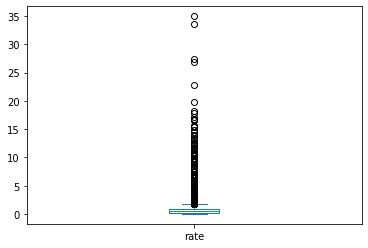

In [305]:
df_features2['rate'].plot(kind='box')

In [317]:
df_out2 = df_features2[df_features2['rate'] < 1.3]  
df_out2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14563 entries, 0 to 15288
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Credito               14563 non-null  int64         
 1   agencia               14563 non-null  int64         
 2   tipo                  14563 non-null  object        
 3   primera_asignacion    14563 non-null  datetime64[ns]
 4   nombre                14563 non-null  object        
 5   nombre_conyuge        14563 non-null  object        
 6   nombre_garante        14563 non-null  object        
 7   ciudad                14563 non-null  object        
 8   producto              14563 non-null  object        
 9   dias_atraso           14563 non-null  int64         
 10  grupo_castigo         14563 non-null  datetime64[ns]
 11  ultimo_pago           14563 non-null  object        
 12  monto                 14563 non-null  int64         
 13  nro_cuotas_atras

<AxesSubplot:>

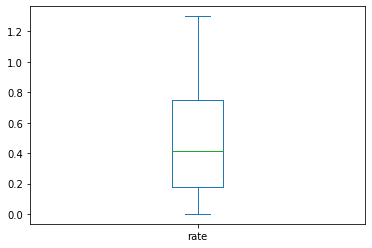

In [318]:
df_out2['rate'].plot(kind='box')

## Exploratory Data Analysis

/tmp/ipykernel_769/220051646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_out2.corr(), cmap="YlGnBu", annot=True)


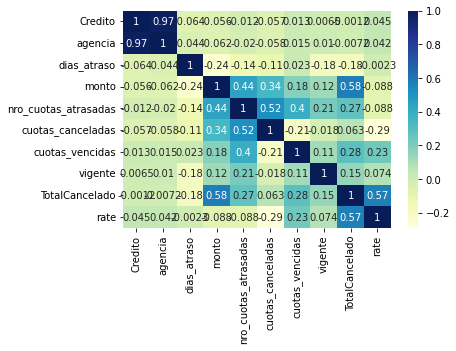

In [319]:
import seaborn as sns
dataplot = sns.heatmap(df_out2.corr(), cmap="YlGnBu", annot=True)


In [320]:
df_atraso_rate = df_out2[['dias_atraso','rate']]
df_atraso_rate.head()

,dias_atraso,rate
0,3157,0.847561
1,2117,0.308029
3,2635,1.257333
4,2449,0.073892
5,2185,0.339806


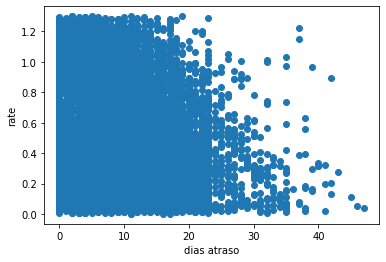

In [325]:
import matplotlib.pyplot as plt

# Plot dias atraso vs rate
plt.scatter(df_out2['cuotas_canceladas'], df_out2['rate'])

# Labels
plt.xlabel("dias atraso")
plt.ylabel("rate")

plt.show()

In [327]:
 df_out2['cuotas_canceladas'].describe()

count    14563.000000
mean        10.536771
std          6.652081
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max         47.000000
Name: cuotas_canceladas, dtype: float64

In [5]:
df_resumen_creditos.to_csv("resumen_creditos.csv",index=False)

In [3]:
df_gestiones_2022 =pd.read_excel(f'datos_avance.xlsx',sheet_name='gestiones_2022')
df_gestiones_2022.head()



,Consecutivo_Seguimiento,Consecutivo,Numero_De_Obligacion,Fecha_Seguimiento,Dias_de_Mora,Asesor,Estado_De_Cobro,Clase de Gestion,Telefonos,Nota,Grabador,Hora_Inicial,Hora_Final,Duración,Nombre /descripcion Plantilla,Hora De Compromiso,Fecha_Promesa,Codigo_De_Cobro_Anterior,Codigo_de_gestión_causal,Control
0,18881632,1375683,677161005062,2022-01-03 08:03:25,1135,goech,titular interesado pero no genera acuerdo,TEL,3.506130e+09,3177054605 : tt cancelo 100.000 en cds\t,andrybolivar,08:01:43,08:03:14,00:01:31,NaN,00:00:00,0000-00-00,1,5061,0
1,18881638,1400772,636171011538,2022-01-03 08:07:41,1040,goech,recordaciÃ³n efectiva,TEL,3.125378e+09,3125378052 Nadie contesta se deja mensaje de ...,mcaicedo,08:03:59,08:07:39,00:03:40,NaN,00:00:00,0000-00-00,1,702,0
2,18881641,1265673,615161010256,2022-01-03 08:07:46,1883,goech,recordaciÃ³n efectiva,TEL,3.205884e+09,"3103474359 $ 3,860,065.00 cod Marcial Andres A...",luzrey,07:59:40,08:07:03,00:07:23,NaN,00:00:00,0000-00-00,1,703,0
3,18881642,1335862,668171005546,2022-01-03 08:08:49,1240,goech,recordaciÃ³n efectiva,TEL,3.192947e+09,Blanca Libia Moreno Montoya\tCel\t\t\t31929472...,xorozco,08:03:42,08:08:44,00:05:02,NaN,00:00:00,0000-00-00,1,702,0
4,18881643,1708150,646181010441,2022-01-03 08:09:03,524,goech,recordaciÃ³n efectiva,TEL,3.184301e+09,3117550804 se confirma pago\t,andrybolivar,08:04:11,08:08:27,00:04:16,NaN,00:00:00,0000-00-00,1,703,0


In [6]:
df_gestiones_2022.to_csv("gestiones_2022.csv",index=False)

In [9]:
df.columns

Index(['FechaCaptura', 'Credito', 'FechaAPagar', 'VRCancelar', 'PuntoPago',
       'TipoPago', 'Asesor', 'VrTotalObligacion', 'VrTotalNegociado',
       'Condonacion', 'TipoPago2', 'Cuotas', 'VrCuota1', 'VrOtrasCuotas',
       'CuotaNumero', 'Estado', 'FechaPago'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FechaCaptura       2643 non-null   datetime64[ns]
 1   Credito            2643 non-null   int64         
 2   FechaAPagar        2643 non-null   datetime64[ns]
 3   VRCancelar         2643 non-null   int64         
 4   PuntoPago          2643 non-null   object        
 5   TipoPago           2640 non-null   object        
 6   Asesor             324 non-null    object        
 7   VrTotalObligacion  2643 non-null   int64         
 8   VrTotalNegociado   2643 non-null   int64         
 9   Condonacion        2643 non-null   int64         
 10  TipoPago2          0 non-null      float64       
 11  Cuotas             2643 non-null   int64         
 12  VrCuota1           2643 non-null   int64         
 13  VrOtrasCuotas      2643 non-null   int64         
 14  CuotaNum

<AxesSubplot:>

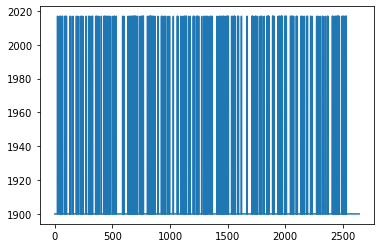

In [13]:
df['FechaPago'].plot()

In [16]:
df['FechaPago'].nunique().value_counts()

AttributeError: 'int' object has no attribute 'value_counts'

In [ ]:
x = df['FechaPago']

